# Solve the Field Equation

In [14]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import scipy.constants as c

import axion_mass
from config import model
import g_star
import time_temp
import T_osc_solver
import eom_solver
import density_plot

/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in log
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d
/home/janik/Documents/bachelor/axion_mass.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(chi(T)) / f_a


CPU times: user 5.13 s, sys: 19.4 ms, total: 5.15 s
Wall time: 5.12 s
T_osc = 984112560.444


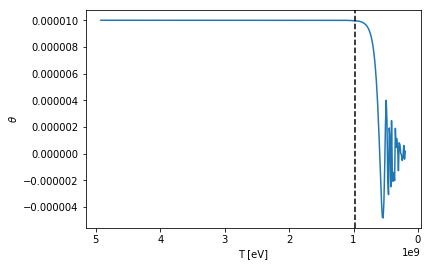

In [2]:
f_a = 1e12 * 1e9
m_a_fn = axion_mass.m_a_from_chi_general
g_model = g_star.borsamyi_table
theta_i = 1e-5
%time T, phi = eom_solver.sim_axion_field_evo_T(theta_i, f_a, m_a_fn, g_model)
plt.plot(T, phi)
plt.xlabel("T [eV]")
plt.ylabel(r"$\theta$")
T_osc = T_osc_solver.find_T_osc(f_a, m_a_fn, g_model)
plt.axvline(T_osc, color="black", linestyle="--")
print("T_osc =", T_osc)
plt.gca().invert_xaxis()

In [20]:
eom_solver = importlib.reload(eom_solver)
density_plot = importlib.reload(density_plot)

In [10]:
%time T, theta, dthetadT = eom_solver.find_axion_field_osc_vals(theta_i, f_a, m_a_fn, g_model)
%time eom_solver.compute_density_parameter_from_field(T, theta, dthetadT, f_a, m_a_fn, g_model)

CPU times: user 962 ms, sys: 4.02 ms, total: 966 ms
Wall time: 960 ms
CPU times: user 543 µs, sys: 0 ns, total: 543 µs
Wall time: 542 µs


/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in double_scalars
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d
/home/janik/Documents/bachelor/axion_mass.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(chi(T)) / f_a


0.0017395116942498497

0 of 100

/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in double_scalars
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d
/home/janik/Documents/bachelor/axion_mass.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(chi(T)) / f_a


 done
1 of 100 done
2 of 100 done
3 of 100 done
4 of 100 done
5 of 100 done
6 of 100 done
7 of 100 done
8 of 100

/home/janik/Documents/bachelor/axion_mass.py:183: RuntimeWarning: invalid value encountered in power
  correction_factor = (1 - np.log(model.Lambda_QCD / T))**d


 done
9 of 100 done
10 of 100 done
11 of 100 done
12 of 100 done
13 of 100 done
14 of 100 done
15 of 100 done
16 of 100 done
17 of 100 done
18 of 100 done
19 of 100 done
20 of 100 done
21 of 100 done
22 of 100 done
23 of 100 done
24 of 100 done
25 of 100 done
26 of 100 done
27 of 100 done
28 of 100 done
29 of 100 done
30 of 100 done
31 of 100 done
32 of 100 done
33 of 100 done
34 of 100 done
35 of 100 done
36 of 100 done
37 of 100 done
38 of 100 done
39 of 100 done
40 of 100 done
41 of 100 done
42 of 100 done
43 of 100 done
44 of 100 done
45 of 100 done
46 of 100 done
47 of 100 done
48 of 100 done
49 of 100 done
50 of 100 done
51 of 100 done
52 of 100 done
53 of 100 done
54 of 100 done
55 of 100 done
56 of 100 done
57 of 100 done
58 of 100 done
59 of 100 done
60 of 100 done
61 of 100 done
62 of 100 done
63 of 100 done
64 of 100 done
65 of 100 done
66 of 100 done
67 of 100 done
68 of 100 done
69 of 100 done
70 of 100 done
71 of 100 done
72 of 100 done
73 of 100 done
74 of 100 done
75 of

/home/janik/Documents/bachelor/density_plot.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(f_a / 1e9, theta_i, np.log10(Omega_a_h_sq) , 10)


TypeError: Inputs x and y must be 1D or 2D.

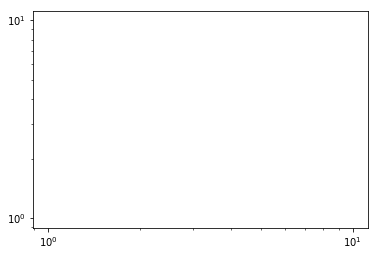

In [16]:
theta_i_s = np.logspace(-5, 0, 10)
f_a_s = np.logspace(9, 18, 10) * 1e9
Omega_a_h_sq = np.empty((theta_i_s.size, f_a_s.size))
total = theta_i_s.size * f_a_s.size
for i, theta_i in enumerate(theta_i_s):
    for j, f_a in enumerate(f_a_s):
        print(i * theta_i_s.size + j, "of", total, end="")
        Omega_a_h_sq[i,j] = eom_solver.compute_density_parameter(theta_i, f_a, m_a_fn, g_model)
        print(" done")

/home/janik/Documents/bachelor/density_plot.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.contourf(f_a / 1e9, theta_i, np.log10(Omega_a_h_sq) , 10)


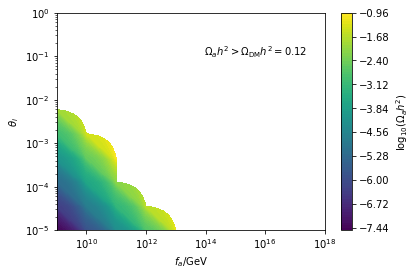

In [21]:
_ = density_plot.plot_density(theta_i_s, f_a_s, Omega_a_h_sq, levels=100)

In [5]:
plt.plot(T, theta)
plt.gca().invert_xaxis()
plt.axhline(0, color="black")

NameError: name 'theta' is not defined

In [ ]:
0.94 * 1e4 / 60 / 60

In [ ]:
from numba import jit

In [ ]:
@jit
def f(x):
    return x*2

In [ ]:
f(12)

In [ ]:
eom_solver.axion_eom_T_rhs